# 주성분 분석

https://github.com/rickiepark/hg-mldl/blob/master/6-3.ipynb


고차원의 데이터를 저차원의 데이터로 환원시키는 기법
* 주성분: 데이터의 분산을 설명하는 원래 변수의 선형 결합. 주성분 벡터의 수는 원본 데이터의 피처 수

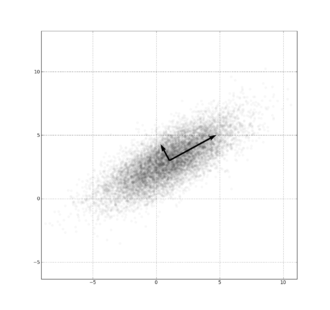


 분산이 가장 커지는 축을 첫 번째 주성분, 두 번째로 커지는 축을 두 번째 주성분으로 놓이도록 새로운 좌표계로 데이터를 선형 변환한다. 두번째 축은 첫번째 축과 벡터 직교한다.

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

In [ ]:
print(pca.components_.shape)

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

In [ ]:
fruits_pca = pca.transform(fruits_2d)

In [ ]:
print(fruits_pca.shape)

# 원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

In [ ]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

# 설명된 분산


원본데이터의 분산을 얼마나 잘 나타내었는지 기록한 값.

차원 축소된 피처의 분산. 설명된 분산을 나타내는 그래프를 살펴보면 적절한 주성분 개수를 찾는데 도움이 된다.

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

In [ ]:
plt.plot(pca.explained_variance_ratio_)